In [131]:
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

In [132]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 

In [133]:
irisRaw = load_iris()
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

In [134]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Data Visualization** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


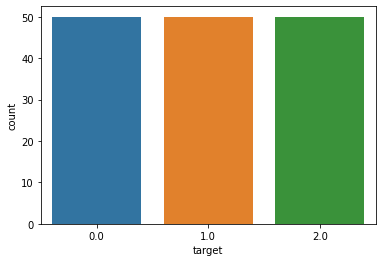

In [135]:
import seaborn as sns
sns.countplot(iris['target'],label="Count")
plt.show()

We see that representation of each class is equal in dataset.

In [136]:
from math import sqrt
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1): # last value is ignored cause it is label 
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [137]:
from random import shuffle
iris_npy = iris.to_numpy()
# shuffle(iris_npy)
Train_set, Test_set = train_test_split(iris, test_size=0.2)
Train_set_npy = iris_npy[:120, :]
Test_set_npy = iris_npy[120:, :]
# for i in range(iris_npy.shape[0]-1):
  # distances[i] = np.sort(distance)
  # print(euclidean_distance(iris_npy[i, :], iris_npy[i+1, :]))

In [138]:
def get_neighbors(train_set, test_row, num_of_neighbors: int = 3):
  distances = list()
  for train_row in train_set:
    distance = euclidean_distance(test_row, train_row)
    distances.append((train_row, distance))
  distances.sort(key=lambda row: row[1])
  neigbors = list()
  for i in range(num_of_neighbors):
    neigbors.append(distances[i][0])
  return neigbors

In [139]:
def predict_knn(train_set, test_row, num_of_neighbors: int = 3):
    neighbs = get_neighbors(train_set, test_row, num_of_neighbors)
    labels = [row[-1] for row in neighbs]
    prediction = max(set(labels), key=labels.count)
    return prediction

**Verifying accuracy of KNN algorithm**

In [140]:
cnt_correct = 0
for i in range(Test_set.shape[0]):
  if predict_knn(Train_set_npy, Test_set_npy[i, :], 3) == Test_set_npy[i, -1]:
    cnt_correct += 1

print(f'Accuracy of algorithm: {round(cnt_correct/Test_set.shape[0], 2) * 100}%')

Accuracy of algorithm: 77.0%


**Ex.2 - kNN - Python (sklearn)**

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
irisRaw2 = load_iris()
iris2 = pd.DataFrame(data= np.c_[irisRaw2['data'], irisRaw2['target']],
                     columns= irisRaw2['feature_names'] + ['target'])
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(iris2.values, iris2.target, test_size=0.3, random_state=42)

In [143]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train2, Y_train2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_classifier.score(X_train2, Y_train2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_classifier.score(X_test2, Y_test2)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [144]:
neigh_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='brute', weights='distance')
neigh_classifier.fit(X_train2, Y_train2)

KNeighborsClassifier(algorithm='brute', n_neighbors=1, weights='distance')

In [145]:
acc = accuracy_score(Y_test2, neigh_classifier.predict(X_test2))
print(f"We reached {acc * 100}% accuracy.")
print(neigh_classifier.predict_proba(X_test2))


We reached 100.0% accuracy.
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [146]:
print(neigh_classifier.predict_proba(np.array([[5, 2, 3, 0, 1]])))

[[0. 1. 0.]]


**Decision trees** 

In [147]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [148]:
clf.predict(iris.data[:1, :])

array([0])

In [149]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [150]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

**Exercise**

In [151]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from keras.datasets import mnist
 
 
# wczytywanie danych 
#Ex.1.Divide the data into parameters X and answer y:
 
(train_X, train_y), (test_X, test_y) = mnist.load_data()
X = train_X #TODO
y = train_y #TODO

In [152]:
 # Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 20
w = 20

In [153]:
# Ex 2. Please display the number of digits and the number of pixels per image
print(f"Number of specific digits: {len(set(train_y.flatten()))}")
print(f"Digits: {set(train_y.flatten())}")
print(f"Number of pixels per image: {train_X[0].shape[0] * train_X[0].shape[1]}")
print(f"Shape of image: {train_X[0].shape}")

Number of specific digits: 10
Digits: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Number of pixels per image: 784
Shape of image: (28, 28)


In [154]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(2.4 * n_col, 3.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

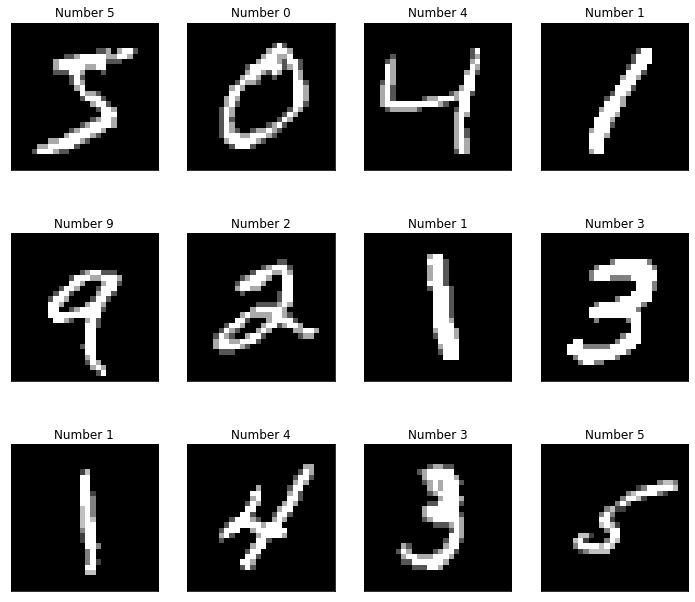

In [155]:
plot_mnist(train_X[:12], [f"Number {train_y[i]}" for i in range(12)], h, w) # With shape 24x24

In [156]:
# Resizing dataset to 20x20
import cv2
resized_train_X = np.zeros((train_X.shape[0], h, w))
resized_test_X = np.zeros((test_X.shape[0], h ,w))
for i in range(train_X.shape[0]):
  resized_train_X[i] = cv2.resize(train_X[i], dsize=(h, w), interpolation=cv2.INTER_CUBIC)
for i in range(test_X.shape[0]):
  resized_test_X[i] = cv2.resize(test_X[i], dsize=(h, w), interpolation=cv2.INTER_CUBIC) # for test dataset
resized_test_X.shape

(10000, 20, 20)

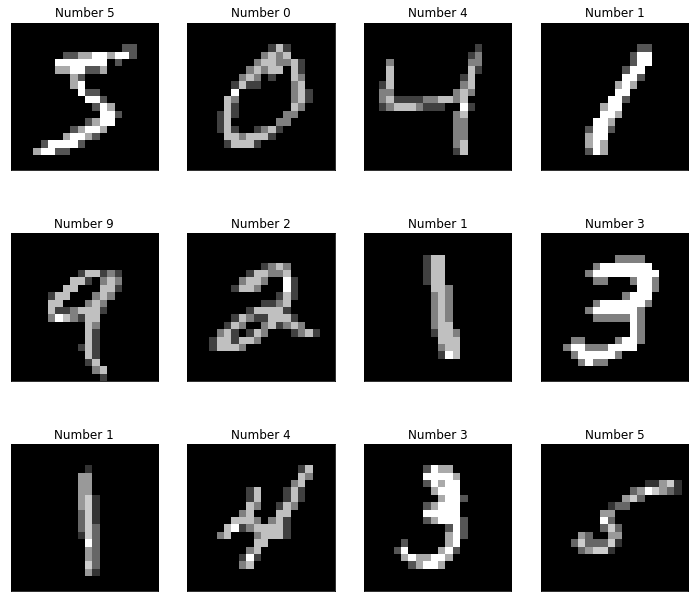

In [157]:
plot_mnist(resized_train_X[:12], [f"Number {train_y[i]}" for i in range(12)], h, w) # With shape 24x24

**Model parameters**

In [158]:
DEPTH = 10

In [159]:
# from sklearn.datasets import load_iris
# from sklearn import tree
clf2 = tree.DecisionTreeClassifier(max_depth=DEPTH)
resized_train_X.shape
train_X.shape

(60000, 28, 28)

In [160]:
flatten_train_X = np.zeros((resized_train_X.shape[0], resized_train_X.shape[1]*resized_train_X.shape[2]))
flatten_test_X = np.zeros((resized_test_X.shape[0], resized_test_X.shape[1]*resized_test_X.shape[2]))
for i in range(resized_train_X.shape[0]):
  flatten_train_X[i] = resized_train_X[i].flatten()
for i in range(resized_test_X.shape[0]):
  flatten_test_X[i] = resized_test_X[i].flatten()
clf2.fit(flatten_train_X, train_y)

DecisionTreeClassifier(max_depth=10)

**Predicting numbers**

In [161]:
predictions = clf2.predict(flatten_test_X)
prediction_sample = clf2.predict(flatten_test_X[20:32])

In [162]:
def plot_prediction(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(2.4 * n_col, 3.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

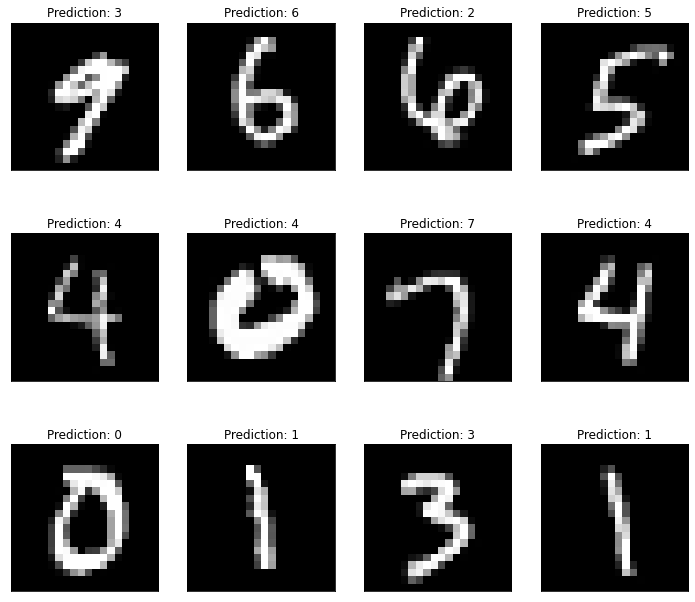

In [163]:
plot_prediction(resized_test_X[20:32], [f"Prediction: {i}" for i in prediction_sample], h, w)

**F1 score**

In [164]:
f1 = f1_score(predictions, test_y, average='weighted') 
print(f"F1_score for test set is: {f1}")

F1_score for test set is: 0.61955281362399


**Classification Report**

In [165]:
dot_data2 = StringIO() 
tree.export_graphviz(clf2, out_file=dot_data2) 
graph = pydot.graph_from_dot_data(dot_data2.getvalue()) 
graph[0].write_pdf("Mnist.pdf")

**Confusion Matrix**

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(18,12))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

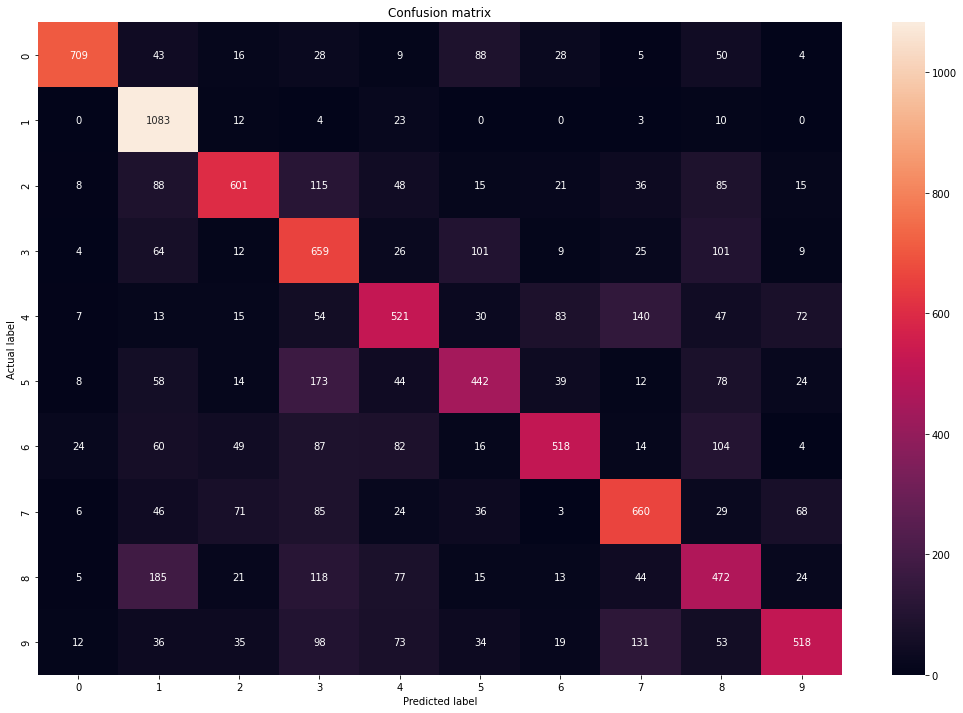

In [167]:
plot_cm(test_y, predictions)